In [1]:
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv('rawPLdataset.csv', sep=';')
X = data.iloc[:, 7:12].values
y = data['Path Loss'].values


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree  import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

mtrc = {
    'MAE': lambda y_true, y_test: metrics.mean_absolute_error(y_true, y_test), 
    'MSE': lambda y_true, y_test: metrics.mean_squared_error(y_true, y_test)
}

# Train - Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


def LR(X_train, X_test, y_train):
    lr = LinearRegression()
    std = StandardScaler()
    X_train_std = std.fit_transform(X_train, y_train)
    X_test_std = std.transform(X_test)
    lr.fit(X_train_std, y_train)
    y_predict = lr.predict(X_test_std)
    return y_predict

def DT(X_train, X_test, y_train):
    dt = DecisionTreeRegressor()
    std = StandardScaler()
    X_train_std = std.fit_transform(X_train, y_train)
    X_test_std = std.transform(X_test)
    dt.fit(X_train_std, y_train)
    y_predict = dt.predict(X_test_std)
    return y_predict

def RF(X_train, X_test, y_train):
    rf = DecisionTreeRegressor()
    std = StandardScaler()
    X_train_std = std.fit_transform(X_train, y_train)
    X_test_std = std.transform(X_test)
    rf.fit(X_train_std, y_train)
    y_predict = rf.predict(X_test_std)
    return y_predict

def SVRG(X_train, X_test, y_train):
    svr = SVR()
    std = StandardScaler()
    X_train_std = std.fit_transform(X_train, y_train)
    X_test_std = std.transform(X_test)
    svr.fit(X_train_std, y_train)
    y_predict = svr.predict(X_test_std)
    return y_predict

# def MLP(X_train, X_test, y_train):
#     mlp = MLPRegressor(hidden_layer_sizes=(20, 10, 5), max_iter= int(1E5), activation='relu', solver = 'adam')
#     std = StandardScaler()
#     X_train_std = std.fit_transform(X_train, y_train)
#     X_test_std = std.transform(X_test)
#     mlp.fit(X_train_std, y_train)
#     y_predict = mlp.predict(X_test_std)
#     return y_predict



def tuned_MLP(X_train, y_train):
    parameters_MLP = {
    'hidden_layer_sizes':[(256,), (128,), (64,), (32,), (16,), (8,)],
    'activation': ['relu'],
    'solver': ['adam', 'lbfgs', 'sgd'], 
    'learning_rate':['constant', 'adaptive'],
    'batch_size':[16, 32, 64]
    }

    mlp = MLPRegressor(max_iter=2000)
    clf = GridSearchCV(mlp, parameters_MLP)
    clf.fit(X_train, y_train)
    sorted(clf.cv_results_.keys())
    print('Best params are:', clf.best_params_)
    tuned_MLP = MLPRegressor(**clf.best_params_)
    return tuned_MLP

def MLP(X_train, X_test, y_train, tuned_MLP):
    tuned_mlp = tuned_MLP(X_train, y_train)
    std = StandardScaler()
    X_train_std = std.fit_transform(X_train, y_train)
    X_test_std = std.transform(X_test)
    tuned_mlp.fit(X_train_std, y_train)
    y_predict = tuned_mlp.predict(X_test_std)
    return y_predict


c:\Users\webjo\anaconda3\envs\CFGRIB\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\webjo\anaconda3\envs\CFGRIB\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\webjo\anaconda3\envs\CFGRIB\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converg

Best params are: {'activation': 'relu', 'batch_size': 16, 'hidden_layer_sizes': (256,), 'learning_rate': 'adaptive', 'solver': 'adam'}


c:\Users\webjo\anaconda3\envs\CFGRIB\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MAE_DT: 1.6005300867751366
MAE_RF: 1.5960321231537666
MAE_SVR: 2.7374975591940878
MAE_MLP: 2.1221632758443554


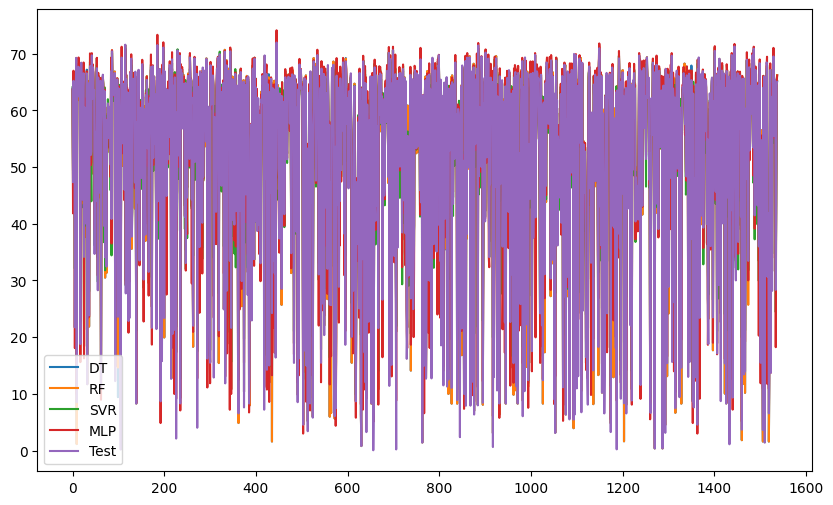

In [9]:
# y_predict_LR = LR(X_train, X_test, y_train)
y_predict_DT = DT(X_train, X_test, y_train)
y_predict_RF = RF(X_train, X_test, y_train)
y_predict_SVR = SVRG(X_train, X_test, y_train)
y_predict_MLP = MLP(X_train, X_test, y_train, tuned_MLP)


fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 6)
# ax.plot(y_predict_LR)
ax.plot(y_predict_DT)
ax.plot(y_predict_RF)
ax.plot(y_predict_SVR)
ax.plot(y_predict_MLP)
ax.plot(y_test)
ax.legend(['DT', 'RF', 'SVR', 'MLP', 'Test'])

# print('MAE_LR:', mtrc['MAE'](y_test, y_predict_LR))
print('MAE_DT:', mtrc['MAE'](y_test, y_predict_DT))
print('MAE_RF:', mtrc['MAE'](y_test, y_predict_RF))
print('MAE_SVR:', mtrc['MAE'](y_test, y_predict_SVR))
print('MAE_MLP:', mtrc['MAE'](y_test, y_predict_MLP))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


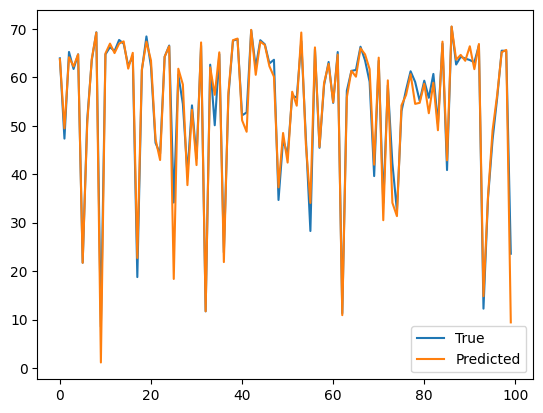

In [10]:
plt.plot(y_test[:100])
plt.plot(y_predict_DT[:100])
plt.legend(['True', 'Predicted'])
plt.savefig('pred.eps')


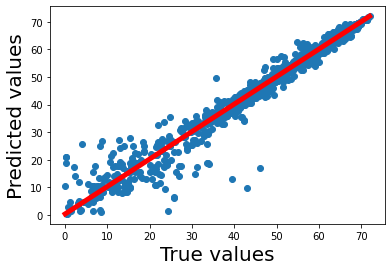

In [5]:
#scatter plot


plt.scatter(y_test, y_predict_DT)
p1 = [y_test.min(), y_predict_DT.min()]
p2 = [y_test.max(), y_predict_DT.max()]
plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color='red', linewidth=5)
plt.xlabel('True values', fontsize=20)
plt.ylabel('Predicted values', fontsize=20)
plt.savefig('scatter.pdf')

# Keras

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

std = StandardScaler()
X_train_std = std.fit_transform(X_train, y_train)
X_test_std = std.transform(X_test)

model = Sequential()
model.add(Input(shape=(X_train_std.shape[1], )))
model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation = 'linear'))
model.output_shape

(None, 1)

In [7]:
model.compile(loss='mae',
              optimizer='adam',
              metrics=['mean_absolute_error'])

In [8]:
history = model.fit(X_train_std, y_train, validation_split = 0.2, epochs=500, batch_size=16)



Epoch 1/500
308/308 [==============================] - 2s 2ms/step - loss: 24.1294 - mean_absolute_error: 24.1294 - val_loss: 7.5528 - val_mean_absolute_error: 7.5528
Epoch 2/500
308/308 [==============================] - 0s 2ms/step - loss: 6.9671 - mean_absolute_error: 6.9671 - val_loss: 6.6117 - val_mean_absolute_error: 6.6117
Epoch 3/500
308/308 [==============================] - 0s 1ms/step - loss: 6.4244 - mean_absolute_error: 6.4244 - val_loss: 6.3946 - val_mean_absolute_error: 6.3946
Epoch 4/500
308/308 [==============================] - 1s 2ms/step - loss: 6.1832 - mean_absolute_error: 6.1832 - val_loss: 6.0493 - val_mean_absolute_error: 6.0493
Epoch 5/500
308/308 [==============================] - 0s 2ms/step - loss: 5.3823 - mean_absolute_error: 5.3823 - val_loss: 4.5045 - val_mean_absolute_error: 4.5045
Epoch 6/500
308/308 [==============================] - 1s 2ms/step - loss: 3.9321 - mean_absolute_error: 3.9321 - val_loss: 3.7128 - val_mean_absolute_error: 3.7128
Epoch 7/

KeyboardInterrupt: 

In [ ]:
y_predict_MLP = model.predict(X_test_std)
print('MAE_MLP:', mtrc['MAE'](y_test, y_predict_MLP))

49/49 [==============================] - 0s 699us/step
MAE_MLP: 1.7826645997280584


# TODO
## Feature importance analysis
## To show every metric 

In [ ]:
plt.scatter(y_test, y_predict_RF)
plt.plot([0, 80], [0, 80], 'r')

In [ ]:
np.sqrt(mtrc['MSE'](y_test, y_predict_DT))